Assignment:3) 	Use breast cancer dataset and apply Gaussian naïve bayes to create a classification model for predicting whether a person suffers from cancer or not. Check the accuracy of your model.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
read_file = pd.read_csv (r'C:\Users\sonaw\Practical Machine Learning\BreastCancer.txt')
read_file.to_csv (r'C:\Users\sonaw\Practical Machine Learning\BreastCancer.csv', index=None)

In [3]:
df=pd.read_csv("BreastCancer.csv")
df

,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4
...,...,...,...,...,...,...,...,...,...,...,...
693,776715,3,1,1,1,3,2,1,1,1,2
694,841769,2,1,1,1,2,1,1,1,1,2
695,888820,5,10,10,3,7,3,8,10,2,4
696,897471,4,8,6,4,3,4,10,6,1,4


In [4]:
# Rename column names
col_names = ['SampleCodeNo','ClumpThickness','UniformityOfCellSize','UniformityOfCellShape','MarginalAdhesion','SingleEpithelialCellSize','BareNuclei','BlandChromatin','NormalNucleoli','Mitoses','Class']
df.columns = col_names

In [5]:
df.head()

,SampleCodeNo,ClumpThickness,UniformityOfCellSize,UniformityOfCellShape,MarginalAdhesion,SingleEpithelialCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses,Class
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


In [6]:
df.shape

(698, 11)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   SampleCodeNo              698 non-null    int64 
 1   ClumpThickness            698 non-null    int64 
 2   UniformityOfCellSize      698 non-null    int64 
 3   UniformityOfCellShape     698 non-null    int64 
 4   MarginalAdhesion          698 non-null    int64 
 5   SingleEpithelialCellSize  698 non-null    int64 
 6   BareNuclei                698 non-null    object
 7   BlandChromatin            698 non-null    int64 
 8   NormalNucleoli            698 non-null    int64 
 9   Mitoses                   698 non-null    int64 
 10  Class                     698 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['BareNuclei'] = le.fit_transform(df['BareNuclei'])
df['BareNuclei']

0      1
1      2
2      4
3      0
4      1
      ..
693    2
694    0
695    3
696    4
697    5
Name: BareNuclei, Length: 698, dtype: int32

In [9]:
df.isnull().sum()

SampleCodeNo                0
ClumpThickness              0
UniformityOfCellSize        0
UniformityOfCellShape       0
MarginalAdhesion            0
SingleEpithelialCellSize    0
BareNuclei                  0
BlandChromatin              0
NormalNucleoli              0
Mitoses                     0
Class                       0
dtype: int64

In [10]:
df.describe()

,SampleCodeNo,ClumpThickness,UniformityOfCellSize,UniformityOfCellShape,MarginalAdhesion,SingleEpithelialCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses,Class
count,6.980000e+02,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000
mean,1.071807e+06,4.416905,3.137536,3.210602,2.809456,3.217765,1.419771,3.438395,2.869628,1.590258,2.690544
std,6.175323e+05,2.817673,3.052575,2.972867,2.856606,2.215408,2.501078,2.440056,3.055004,1.716162,0.951596
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,2.000000
25%,8.702582e+05,2.000000,1.000000,1.000000,1.000000,2.000000,0.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,0.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238354e+06,6.000000,5.000000,5.000000,4.000000,4.000000,1.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [11]:
df.count()

SampleCodeNo                698
ClumpThickness              698
UniformityOfCellSize        698
UniformityOfCellShape       698
MarginalAdhesion            698
SingleEpithelialCellSize    698
BareNuclei                  698
BlandChromatin              698
NormalNucleoli              698
Mitoses                     698
Class                       698
dtype: int64

In [12]:
df.nunique()

SampleCodeNo                644
ClumpThickness               10
UniformityOfCellSize         10
UniformityOfCellShape        10
MarginalAdhesion             10
SingleEpithelialCellSize     10
BareNuclei                   11
BlandChromatin               10
NormalNucleoli               10
Mitoses                       9
Class                         2
dtype: int64

In [13]:
df.columns

Index(['SampleCodeNo', 'ClumpThickness', 'UniformityOfCellSize',
       'UniformityOfCellShape', 'MarginalAdhesion', 'SingleEpithelialCellSize',
       'BareNuclei', 'BlandChromatin', 'NormalNucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [14]:
x=df[['SampleCodeNo','ClumpThickness','UniformityOfCellSize','UniformityOfCellShape','MarginalAdhesion','SingleEpithelialCellSize','BareNuclei','BlandChromatin','NormalNucleoli','Mitoses']]

In [15]:
y=df['Class']

In [16]:
df.mean()

SampleCodeNo                1.071807e+06
ClumpThickness              4.416905e+00
UniformityOfCellSize        3.137536e+00
UniformityOfCellShape       3.210602e+00
MarginalAdhesion            2.809456e+00
SingleEpithelialCellSize    3.217765e+00
BareNuclei                  1.419771e+00
BlandChromatin              3.438395e+00
NormalNucleoli              2.869628e+00
Mitoses                     1.590258e+00
Class                       2.690544e+00
dtype: float64

In [17]:
df.median()

SampleCodeNo                1171710.0
ClumpThickness                    4.0
UniformityOfCellSize              1.0
UniformityOfCellShape             1.0
MarginalAdhesion                  1.0
SingleEpithelialCellSize          2.0
BareNuclei                        0.0
BlandChromatin                    3.0
NormalNucleoli                    1.0
Mitoses                           1.0
Class                             2.0
dtype: float64

In [18]:
x = df.iloc[:,:-1].values
y = df.iloc[:, -1].values

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state =4)

In [20]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [21]:
#Training the Naive Bayes model on the training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

In [22]:
y_pred  =  classifier.predict(x_test)
y_pred

array([4, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2,
       4, 4, 2, 4, 2, 4, 2, 2, 4, 4, 2, 4, 2, 2, 2, 4, 2, 2, 4, 4, 2, 4,
       2, 4, 2, 2, 4, 2, 2, 2, 4, 4, 2, 2, 4, 4, 4, 4, 4, 2, 2, 4, 2, 2,
       2, 4, 2, 4, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 4, 2,
       2, 2, 2, 2, 2, 4, 4, 2, 2, 4, 4, 4, 2, 2, 4, 2, 2, 2, 2, 2, 4, 4,
       2, 2, 2, 4, 2, 2, 2, 4], dtype=int64)

In [23]:
y_test

array([4, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2,
       4, 4, 2, 4, 2, 4, 2, 2, 4, 4, 2, 4, 2, 2, 2, 4, 2, 2, 4, 4, 2, 4,
       2, 4, 2, 2, 4, 2, 2, 2, 4, 4, 2, 2, 2, 4, 4, 4, 4, 2, 2, 4, 2, 2,
       2, 4, 2, 4, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 4, 2,
       2, 2, 2, 2, 2, 4, 4, 2, 2, 4, 4, 4, 2, 2, 4, 2, 2, 2, 2, 2, 4, 4,
       4, 2, 2, 4, 2, 2, 2, 4], dtype=int64)

In [24]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)

In [25]:
# now preparing our model as per Gaussian Naive Bayesian

from sklearn.naive_bayes import GaussianNB

model = GaussianNB().fit(x_train, y_train) #fitting our model

In [26]:
y_pred = model.predict(x_test) #now predicting our model to our test dataset

In [27]:
from sklearn.metrics import accuracy_score

# now calculating that how much accurate our model is with comparing our predicted values and y_test values
accuracy_score = accuracy_score(y_test, y_pred) 
print (accuracy_score)

0.9785714285714285


In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
clf=DecisionTreeClassifier(random_state=0,criterion="gini")
clf.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [30]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [31]:
y_pred = clf.predict(x_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred)*100)

              precision    recall  f1-score   support

           2       0.99      0.96      0.97        89
           4       0.93      0.98      0.95        51

    accuracy                           0.96       140
   macro avg       0.96      0.97      0.96       140
weighted avg       0.97      0.96      0.96       140

[[85  4]
 [ 1 50]]
96.42857142857143


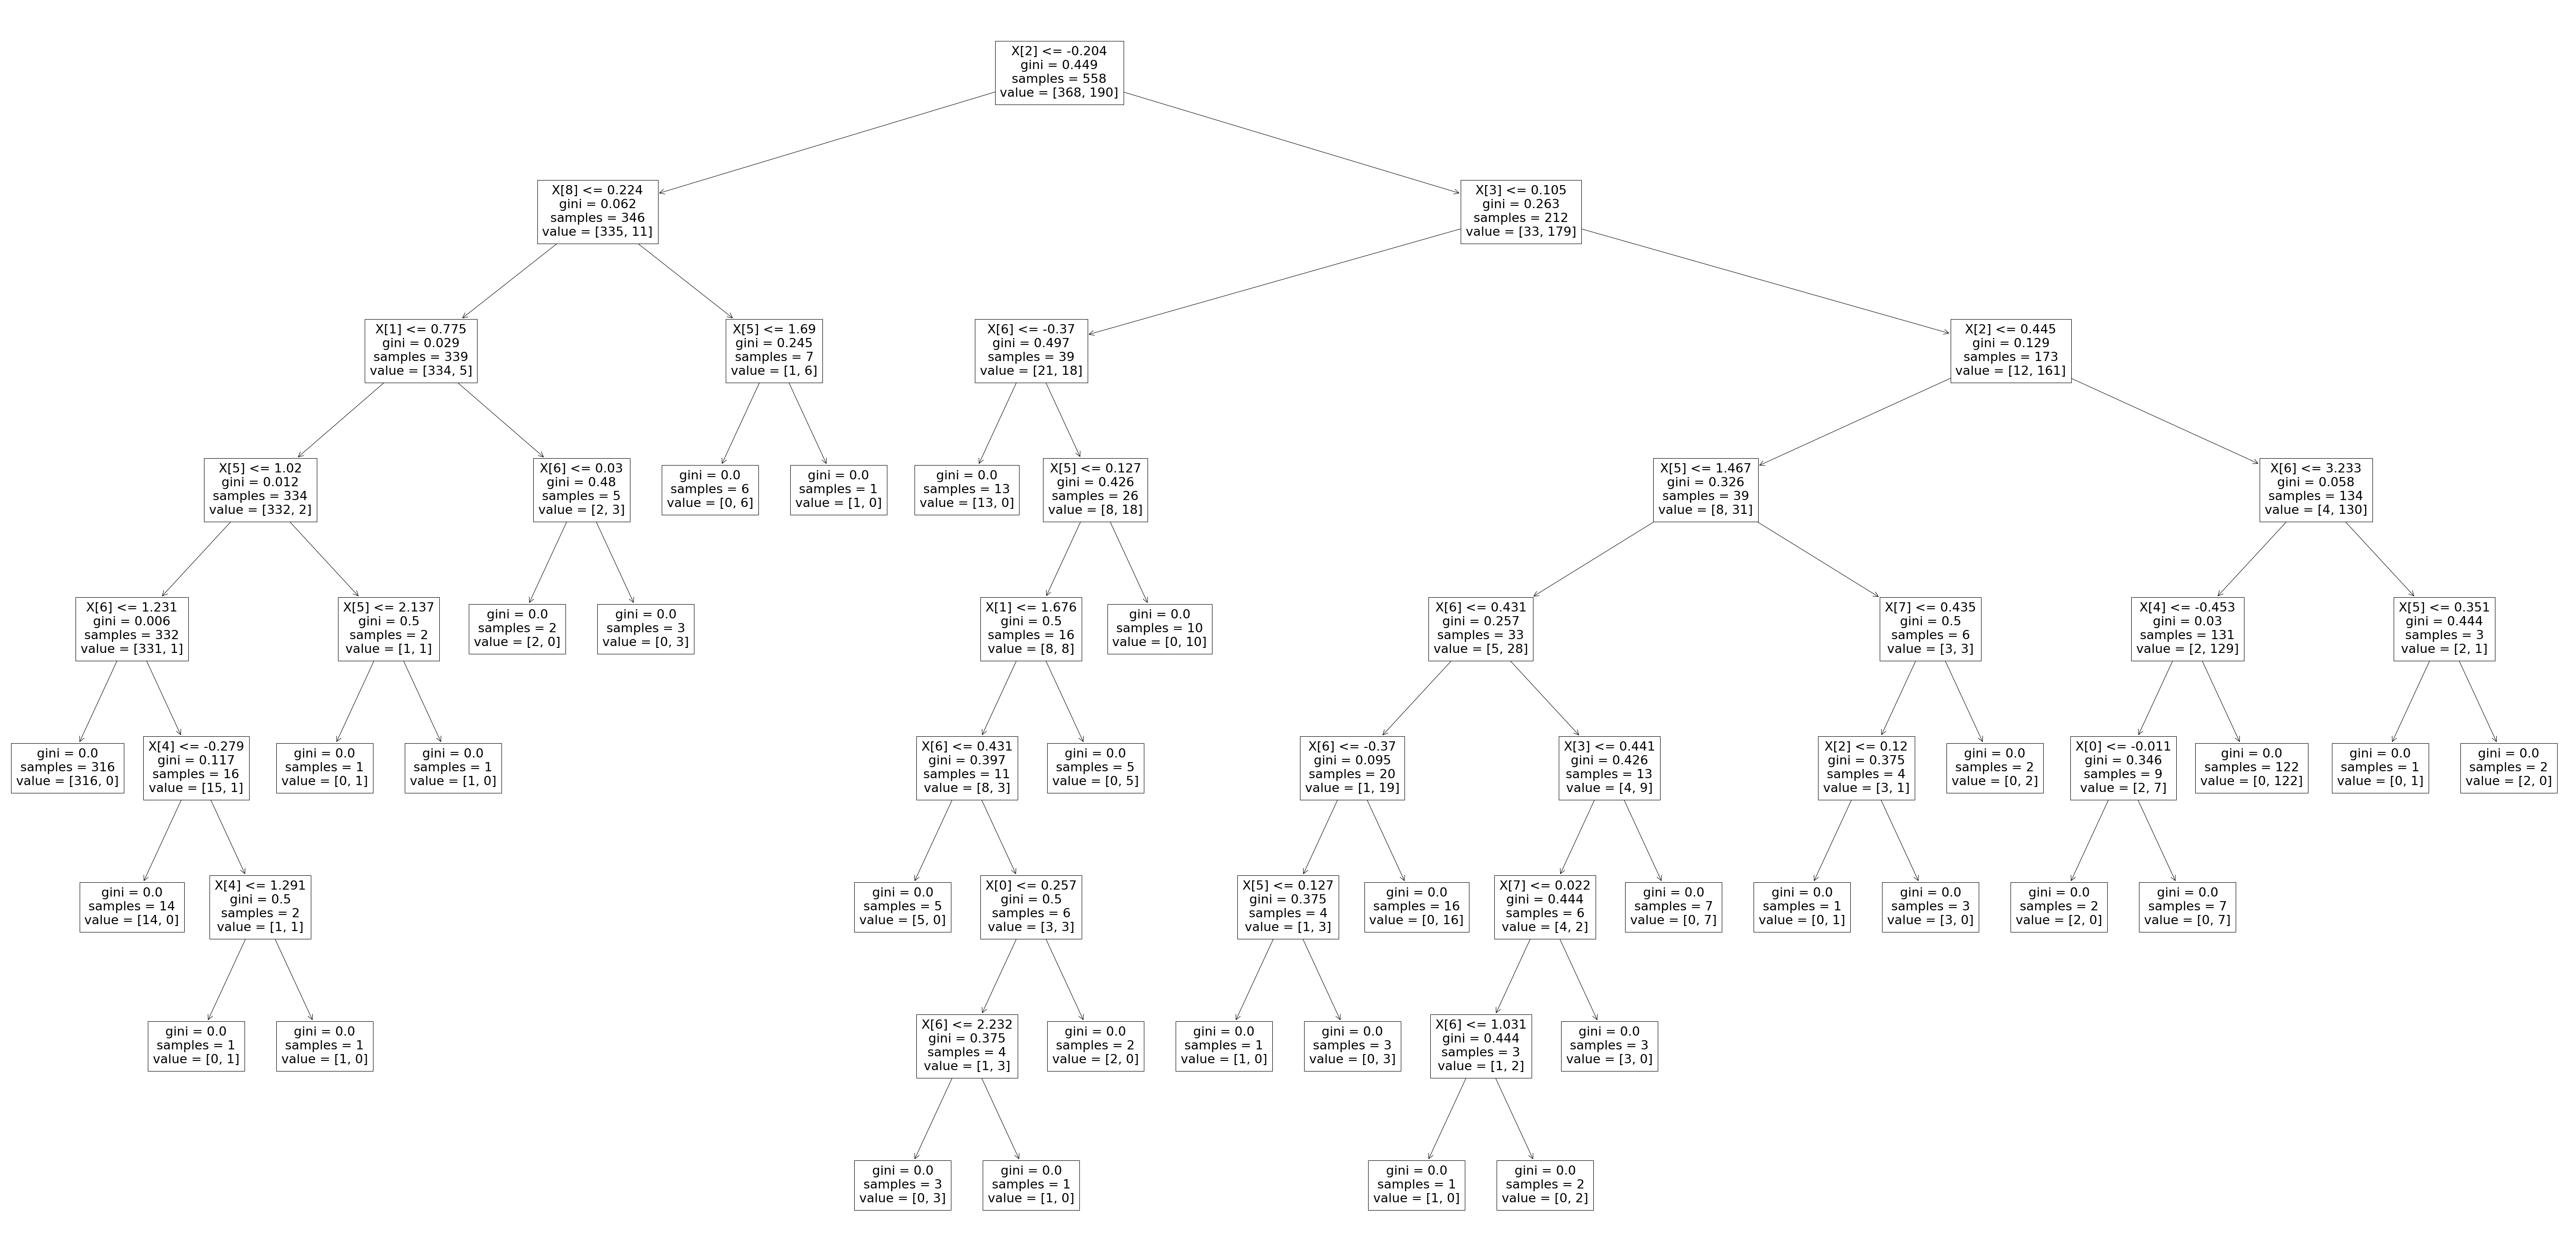

In [32]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(100,50))
tree.plot_tree(clf.fit(x_train, y_train))
plt.show()